# Dataanalyse



<div style="border: 2px solid yellow; padding: 10px; border-radius: 5px; width: 95%; ">
<style>
p {
    line-height: 1.5; 
}
</style>

I denne delen av prosjektet videreutvikles analysen av miljødata ved hjelp av sentrale verktøy innen dataanalyse og visualisering. Gjennom bruk av NumPy og Pandas skal det beregnes statistiske mål som gjennomsnitt og standardavvik for å identifisere mønstre og variasjoner i datasettet. Deretter benyttes Matplotlib til å utforme informative visualiseringer som støtter tolkningen av funnene. Til slutt gjennomføres en prediktiv analyse ved hjelp av lineær regresjon, med mål om å modellere og forutsi fremtidige miljøforhold basert på historiske data.
</div>



In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))


Ved hjelp av NumPy og Pandas vil vi nå regne ut gjennomsnitt, standard avvik og median til værdataen vår.

In [2]:
from statistikk_funksjoner import beregn_statistikk, last_inn_data

df = last_inn_data("../data/BehandletVaerData.csv")

plot_temp = beregn_statistikk(df, "air_temperature P1D", "lufttemperatur")
plot_vind = beregn_statistikk(df, "wind_speed P1D", "vindstyrke")
plot_nedbor = beregn_statistikk(df, "precipitation_amount P1D", "nedbør")



Statistiske værdata for lufttemperatur per by:
           gjennomsnitt  median  standardavvik
by                                            
Bergen             8.92     9.5           5.33
Oslo               7.82     8.6           7.50
Trondheim          5.62     5.8           7.13

Statistiske værdata for vindstyrke per by:
        gjennomsnitt  median  standardavvik
by                                         
Bergen          3.57     3.3           1.67
Oslo            2.63     2.5           0.98

Statistiske værdata for nedbør per by:
           gjennomsnitt  median  standardavvik
by                                            
Bergen             6.71     1.5          10.11
Oslo               1.93     0.0           4.50
Trondheim          2.67     0.5           4.55


<div style="border: 2px solid yellow; padding: 10px; border-radius: 5px; width: 95%; ">
<style>
p {
    line-height: 1.5; 
}
</style>

## Kommentering av statistiske data
### Lufttemperatur

Gjennomsnittstemperaturen er høyest i Bergen (8.92 °C), etterfulgt av Oslo (7.82 °C) og Trondheim (5.62 °C). Medianverdiene følger samme rekkefølge, noe som tyder på at temperaturfordelingen er relativt symmetrisk. Standardavviket er imidlertid høyest i Oslo (7.50), noe som indikerer at temperaturene i Oslo varierer mer gjennom året sammenlignet med de to andre byene. Dette kan skyldes at Oslo har et mer kontinentalt klima, mens Bergen og Trondheim har et jevnere og mildere kystklima.

### Vindstyrke

Bergen har høyest gjennomsnittlig vindstyrke (3.57 m/s), mens Oslo har lavest (2.63 m/s). Medianverdiene er tilsvarende, og standardavviket i Bergen (1.67) viser at vindforholdene varierer mer der enn i Oslo (0.98). Dette er i tråd med geografiske og klimatiske forhold, hvor Bergen som kystby er mer utsatt for værsystemer og vind.

### Nedbør

Nedbøren varierer kraftig mellom byene. Bergen skiller seg markant ut med et gjennomsnitt på 6.71 mm og et høyt standardavvik (10.11), noe som bekrefter byens rykte som en av Norges mest nedbørsrike byer. Medianen på 1.5 mm viser imidlertid at det ofte er mange dager med lite nedbør, men at enkelte dager med kraftig nedbør trekker gjennomsnittet kraftig opp. I Oslo og Trondheim er både gjennomsnitt og standardavvik lavere, og medianverdiene på henholdsvis 0.0 og 0.5 mm indikerer at det ofte er helt nedbørsfrie dager i disse byene.
</div>


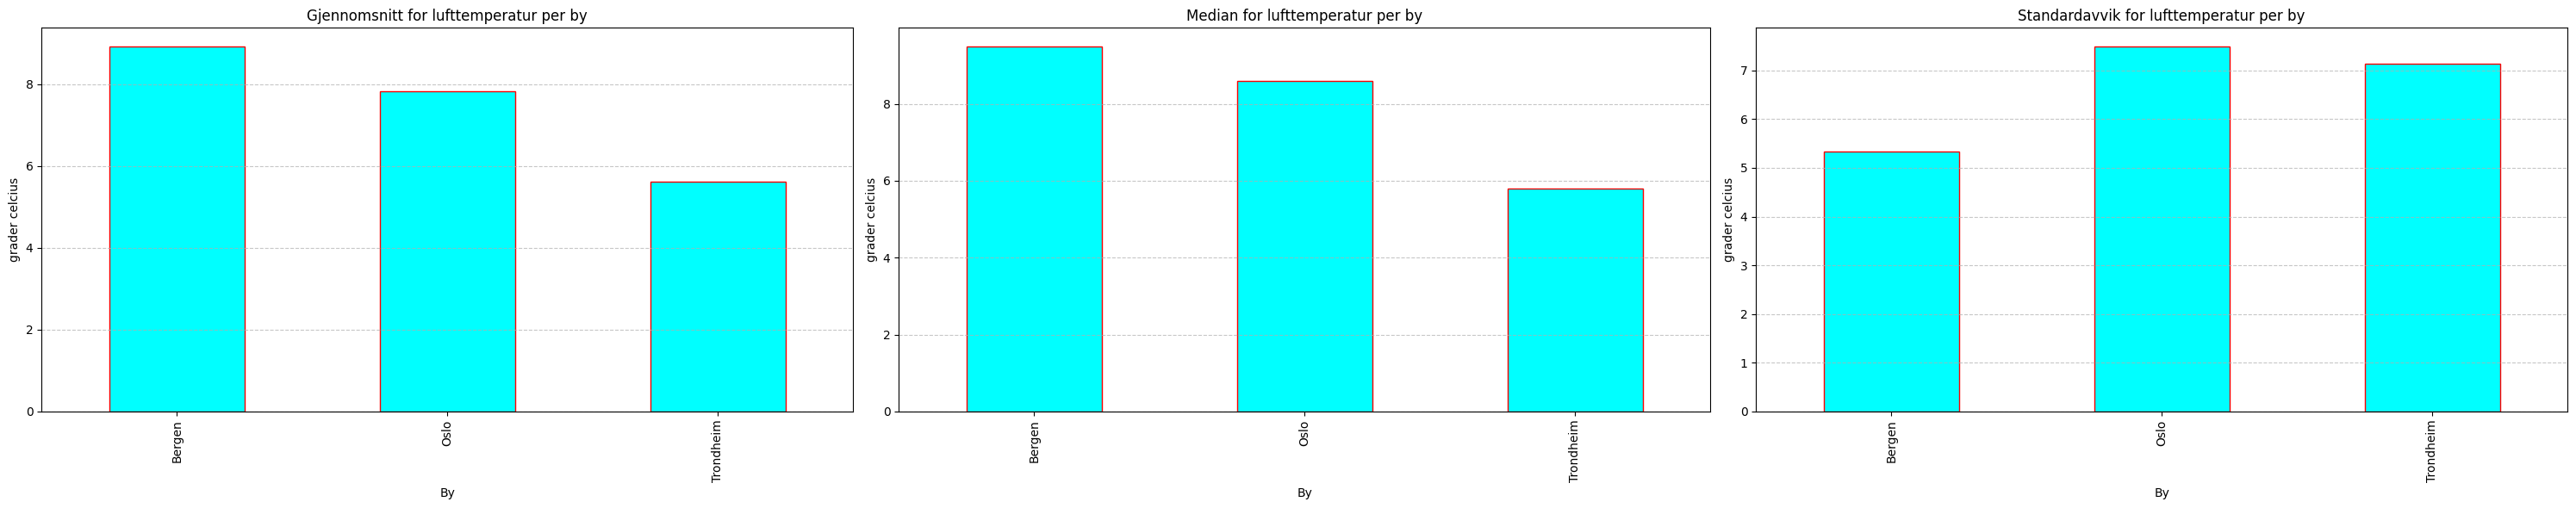

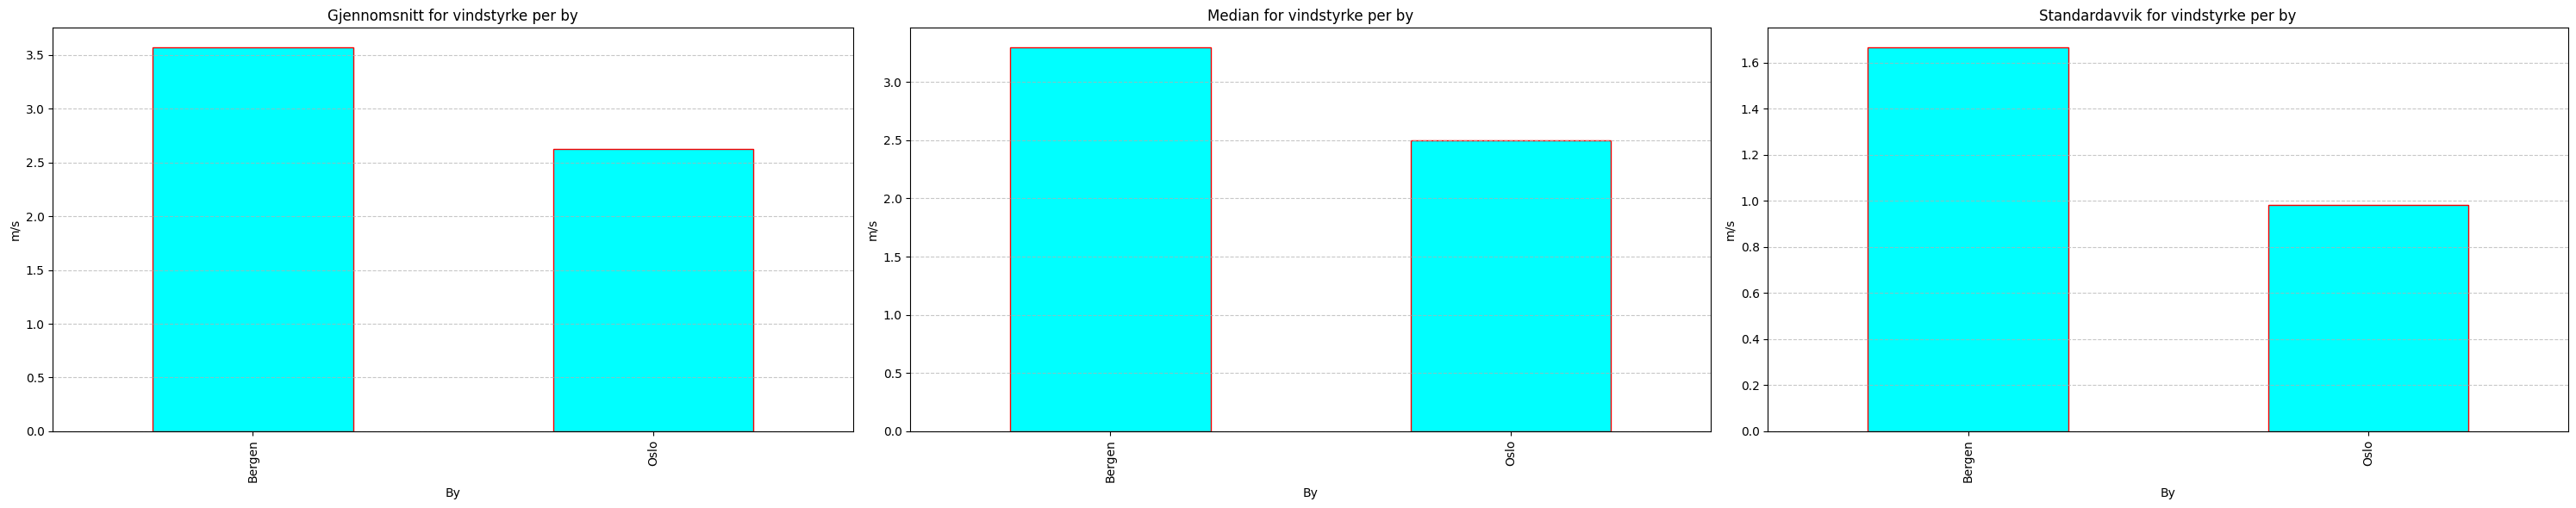

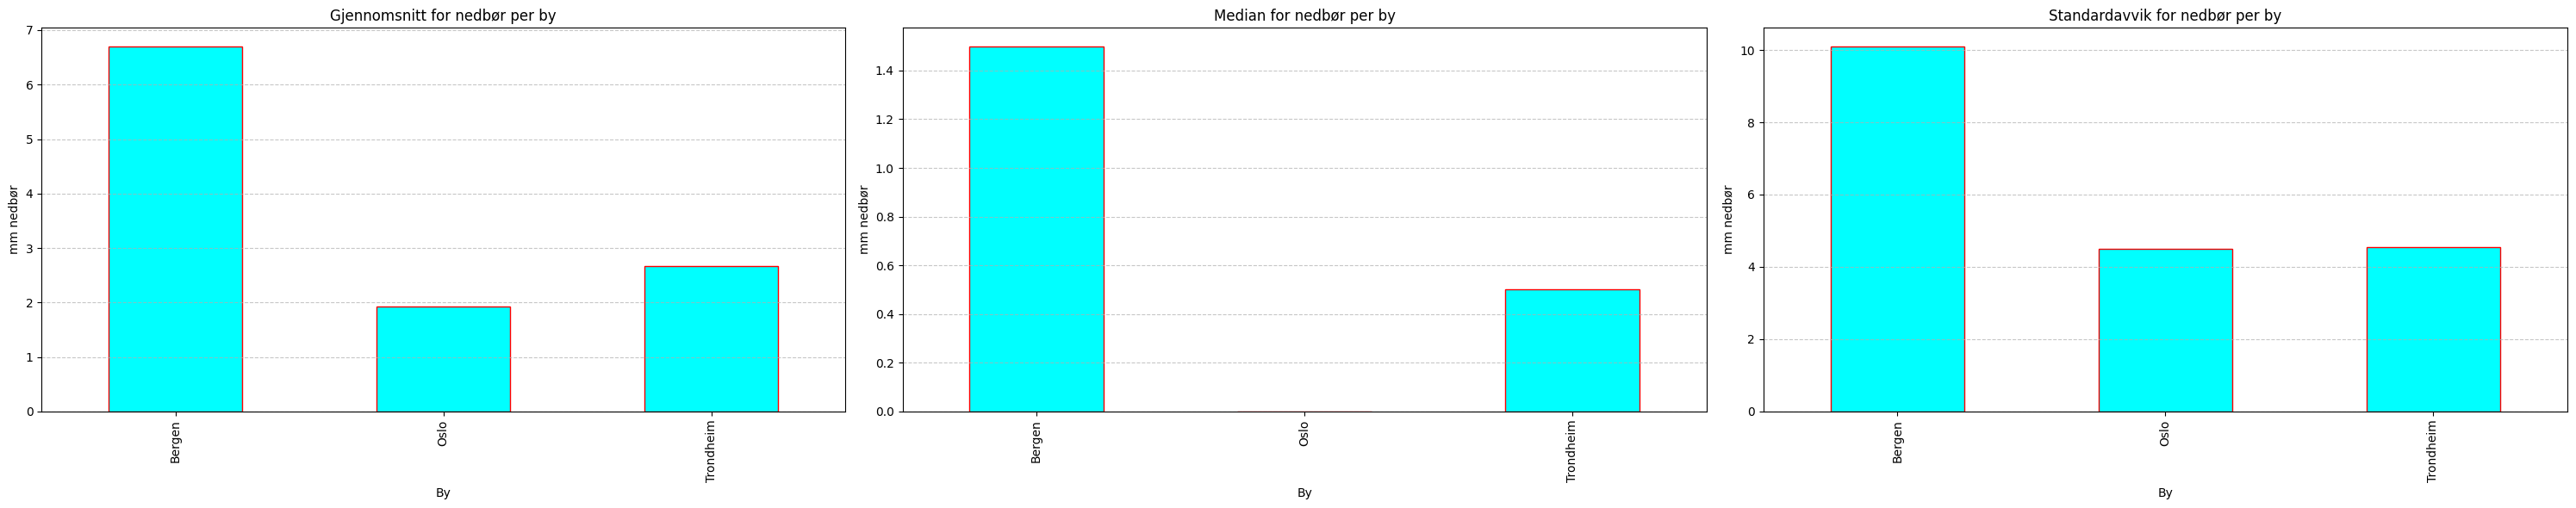

In [3]:
from statistikk_funksjoner import plott_statistikk
# Kaller på plott_statitstikk funksjonen for å lage plott av statistikken som viser median, std.avik og 
# gjennomsnitt for nedbør, vindstyrke og lufttemperatur
plott_statistikk(plot_temp, ["gjennomsnitt", "median", "standardavvik"], "lufttemperatur")
plott_statistikk(plot_vind, ["gjennomsnitt", "median", "standardavvik"], "vindstyrke")
plott_statistikk(plot_nedbor, ["gjennomsnitt","median", "standardavvik"], "nedbør")


# Analyse av sammenhengen mellom variabler 



In [4]:
from statistikk_funksjoner import undersok_korrelasjon

undersok_korrelasjon(df, "air_temperature P1D", "wind_speed P1D", by="Oslo")
undersok_korrelasjon(df, "air_temperature P1D", "wind_speed P1D", by="Bergen")
undersok_korrelasjon(df, "air_temperature P1D", "wind_speed P1D", by="Trondheim")


Korrelasjon mellom 'air_temperature P1D' og 'wind_speed P1D' i Oslo:
Korrelasjonskoeffisient (r): 0.06
P-verdi: 0.2458

Korrelasjon mellom 'air_temperature P1D' og 'wind_speed P1D' i Bergen:
Korrelasjonskoeffisient (r): 0.02
P-verdi: 0.6608
Ingen overlappende data for valgte variabler.


<div style="border: 2px solid yellow; padding: 10px; border-radius: 5px; width: 95%; ">
<style>
p {
    line-height: 1.5; 
}
</style>

### Kommentar til analyse av sammenheng mellom Temperatur og Vindstyrke
Analysen av sammenhengen mellom daglig lufttemperatur og daglig vindhastighet viser svært svake korrelasjoner på tvers av de tre byene. I Oslo ble det funnet en korrelasjon på 0.06 med en p-verdi på 0.2458, som indikerer at det ikke er noen signifikant sammenheng mellom temperatur og vindhastighet i denne byen. I Bergen er korrelasjonen enda svakere, med en verdi på 0.02 og en p-verdi på 0.6608, noe som også tyder på at det ikke er noen statistisk signifikant sammenheng. For Trondheim er det ikke tilgjengelige data for de valgte variablene, og derfor kan ingen analyse gjennomføres for denne byen. Samlet sett viser resultatene at det ikke er noen signifikant lineær sammenheng mellom temperatur og vindhastighet i de undersøkede byene, noe som tyder på at andre faktorer, som værsystemer eller topografi, kan være mer avgjørende for vindforholdene i disse områdene.
</div>

In [5]:
undersok_korrelasjon(df, "air_temperature P1D", "precipitation_amount P1D", by="Oslo")
undersok_korrelasjon(df, "air_temperature P1D", "precipitation_amount P1D", by="Bergen")
undersok_korrelasjon(df, "air_temperature P1D", "precipitation_amount P1D", by="Trondheim")


Korrelasjon mellom 'air_temperature P1D' og 'precipitation_amount P1D' i Oslo:
Korrelasjonskoeffisient (r): 0.11
P-verdi: 0.0443

Korrelasjon mellom 'air_temperature P1D' og 'precipitation_amount P1D' i Bergen:
Korrelasjonskoeffisient (r): -0.05
P-verdi: 0.3102

Korrelasjon mellom 'air_temperature P1D' og 'precipitation_amount P1D' i Trondheim:
Korrelasjonskoeffisient (r): 0.00
P-verdi: 0.9405


<div style="border: 2px solid yellow; padding: 10px; border-radius: 5px; width: 95%; ">
<style>
p {
    line-height: 1.5; 
}
</style>

### Kommentar til analyse av sammenheng mellom Temperatur og Nedbør 

Analysen av sammenhengen mellom daglig lufttemperatur og daglig nedbør i de tre byene viser varierende resultater. For Oslo ble det funnet en svakt positiv korrelasjon på 0.11, med en p-verdi på 0.0443, noe som indikerer en statistisk signifikant, men svært svak sammenheng. Dette antyder at det kan være en liten tendens til at høyere temperaturer er assosiert med økt nedbør, men forholdet er ikke sterkt. I Bergen og Trondheim derimot, er korrelasjonene nær null, med p-verdier på 0.3102 og 0.9405. Dette tyder på at det ikke er noen signifikant sammenheng mellom temperatur og nedbør i disse byene, og eventuelle sammenhenger kan være tilfeldig. Samlet sett kan vi konkludere med at temperaturens påvirkning på nedbør er svak og variabel, og at andre faktorer trolig spiller en større rolle i nedbørsdannelsen i disse områdene.
</div>

In [6]:
undersok_korrelasjon(df, "wind_speed P1D", "precipitation_amount P1D", by="Oslo")
undersok_korrelasjon(df, "wind_speed P1D", "precipitation_amount P1D", by="Bergen")
undersok_korrelasjon(df, "wind_speed P1D", "precipitation_amount P1D", by="Trondheim")


Korrelasjon mellom 'wind_speed P1D' og 'precipitation_amount P1D' i Oslo:
Korrelasjonskoeffisient (r): 0.01
P-verdi: 0.7877

Korrelasjon mellom 'wind_speed P1D' og 'precipitation_amount P1D' i Bergen:
Korrelasjonskoeffisient (r): 0.20
P-verdi: 0.0002
Ingen overlappende data for valgte variabler.


<div style="border: 2px solid yellow; padding: 10px; border-radius: 5px; width: 95%; ">
<style>
p {
    line-height: 1.5; 
}
</style>

### Kommentar til analyse av sammenhengen mellom Vind og Nedbør 
Analysen av sammenhengen mellom daglig vindhastighet og daglig nedbør viser betydelige forskjeller mellom byene. I Oslo ble det funnet en svært svak korrelasjon på 0.01 med en p-verdi på 0.7877, som indikerer at det ikke er noen signifikant sammenheng mellom vindhastighet og nedbør i denne byen. I Bergen derimot, er korrelasjonen betydelig høyere på 0.20, og p-verdien på 0.0002 indikerer en statistisk signifikant sammenheng. Dette kan tyde på at det er en svak positiv sammenheng mellom vindhastighet og nedbør i Bergen, som kan reflektere lokale værforhold eller klimatiske mønstre i denne regionen. For de valgte variablene i Trondheim er det ingen tilgjengelige data for analyse. Samlet sett viser resultatene at vindhastighet har en minimal sammenheng med nedbør i Oslo, men en signifikant sammenheng i Bergen, noe som kan være relatert til spesifikke værfenomener i denne byen.
</div>
